In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data
data=pd.read_csv('mcdonalds.csv')

In [4]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
print("Missing values in each column:")

Missing values in each column:


In [7]:
data.dropna()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [8]:
#time to split the datq into test and train
from sklearn.model_selection import train_test_split

In [9]:
# Remove rows with missing values
data.dropna(inplace=True)

In [10]:
# Check for missing values
data.isnull()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#encoding categorical values
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data[binary_columns] = data[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [12]:
binary_columns

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting']

In [13]:
#now encode gender column
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [14]:
data['Gender']

0       0
1       0
2       0
3       0
4       1
       ..
1448    1
1449    0
1450    0
1451    1
1452    1
Name: Gender, Length: 1453, dtype: int64

In [15]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,1


In [16]:
# Encode VisitFrequency column
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
data['VisitFrequency'] = data['VisitFrequency'].map(visit_frequency_mapping)

In [17]:
data['VisitFrequency']

0       2
1       2
2       2
3       4
4       3
       ..
1448    1
1449    4
1450    3
1451    2
1452    2
Name: VisitFrequency, Length: 1453, dtype: int64

In [18]:
# Clean the Like column
data['Like'] = data['Like'].apply(lambda x: int(x.split('!')[-1]) if isinstance(x, str) else x)

In [19]:
data['Like']

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Normalize Age column
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Features (X): All columns except 'Like'
X = data.drop('Like', axis=1)

In [24]:
# Target (y): 'Like' column
y = data['Like']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Save preprocessed data
data.to_csv('mcdonalds_preprocessed.csv', index=False)

In [27]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,0.811321,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,0.622642,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,0.830189,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,0.962264,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,0.584906,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,0.547170,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,0.339623,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,0.641509,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,0.433962,2,1


In [28]:
#Exploratory Data Analysis (EDA) 
# Summary statistics for numerical columns
print(data[['Age', 'Like']].describe())

               Age         Like
count  1453.000000  1453.000000
mean      0.501980     0.777013
std       0.268324     3.116842
min       0.000000    -5.000000
25%       0.283019    -1.000000
50%       0.509434     1.000000
75%       0.735849     3.000000
max       1.000000     5.000000


In [31]:
print(data.describe())

             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000     0.000000     0

In [29]:
# Summary statistics for categorical columns
print(data['Gender'].value_counts())
print(data['VisitFrequency'].value_counts())

Gender
0    788
1    665
Name: count, dtype: int64
VisitFrequency
3    439
2    342
1    252
4    235
0    131
5     54
Name: count, dtype: int64


In [ ]:
#Distribution of Numerical Variables

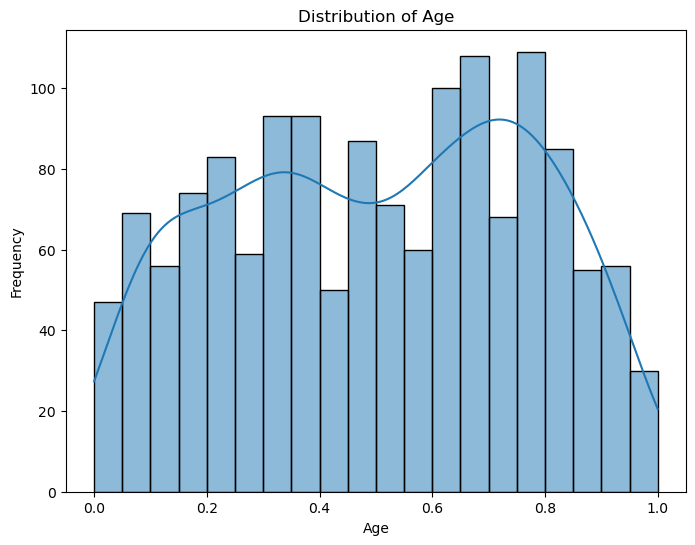

In [33]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

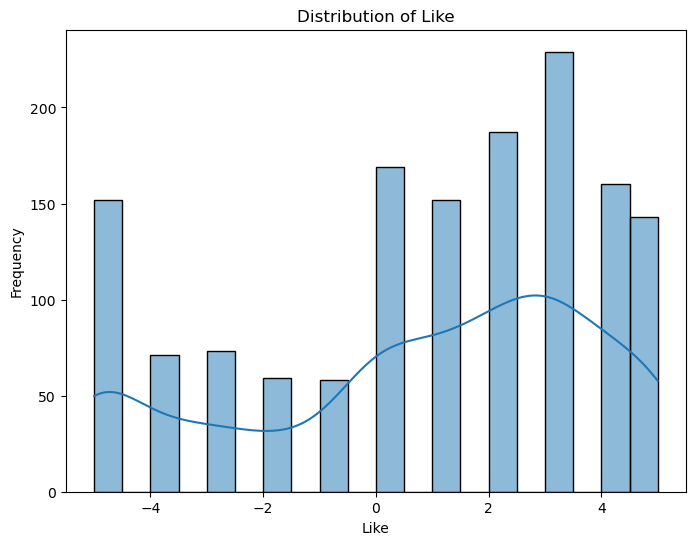

In [35]:
# Histogram for Like
plt.figure(figsize=(8, 6))
sns.histplot(data['Like'], bins=20, kde=True)
plt.title('Distribution of Like')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.show()

In [36]:
#Distribution of Categorical Variables

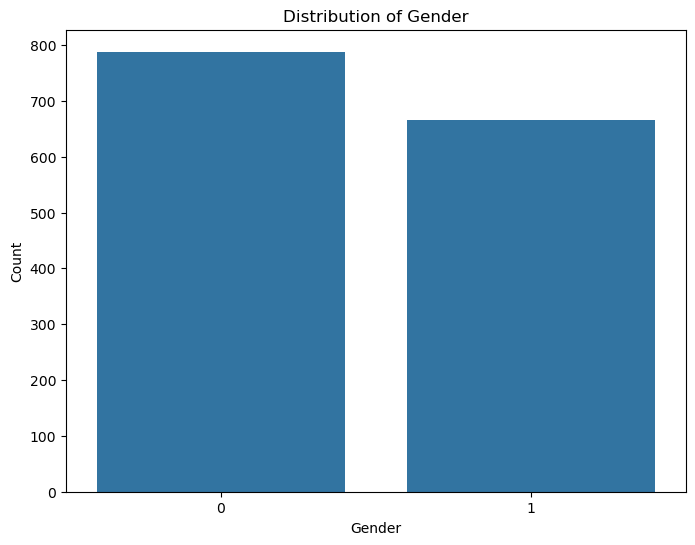

In [38]:
# Bar plot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

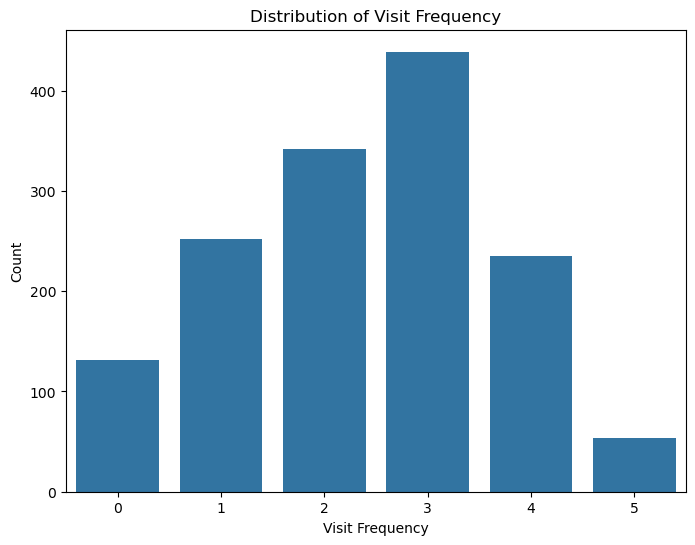

In [40]:
# Bar plot for VisitFrequency
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitFrequency', data=data)
plt.title('Distribution of Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.show()

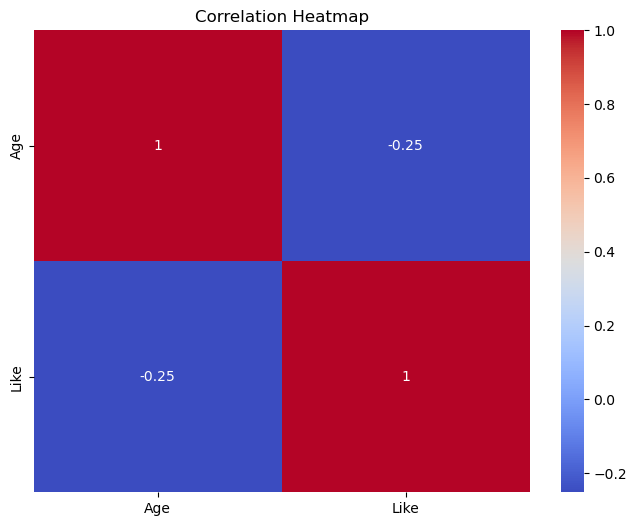

In [42]:
# Correlation matrix
corr = data[['Age', 'Like']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

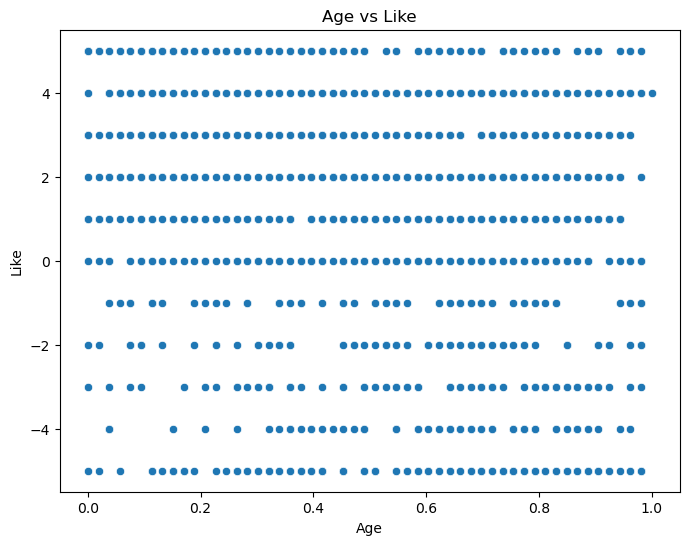

In [43]:
# Scatter plot: Age vs Like
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Like', data=data)
plt.title('Age vs Like')
plt.xlabel('Age')
plt.ylabel('Like')
plt.show()

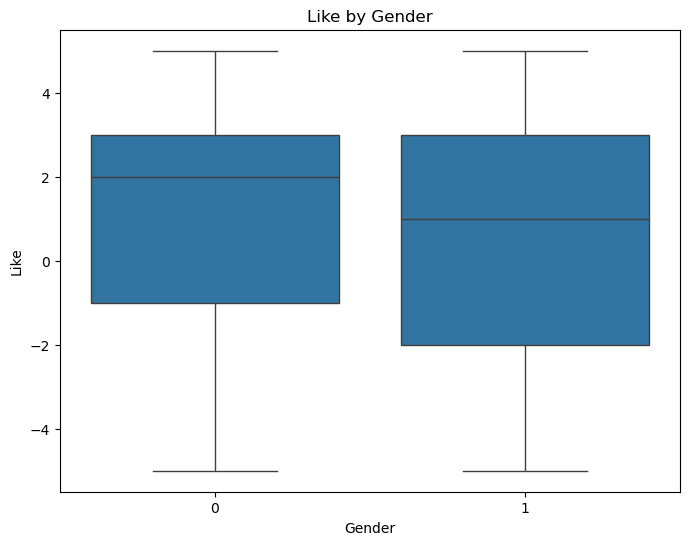

In [44]:
# Box plot: Like by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Like', data=data)
plt.title('Like by Gender')
plt.xlabel('Gender')
plt.ylabel('Like')
plt.show()

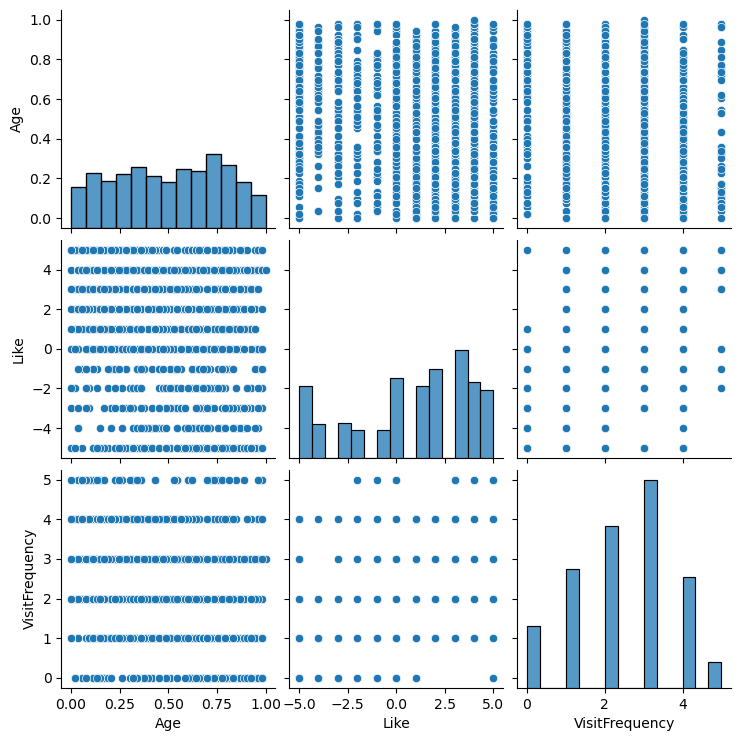

In [45]:
# Pair plot
sns.pairplot(data[['Age', 'Like', 'VisitFrequency']])
plt.show()

In [46]:
#Encode Categorical Variables
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
data['VisitFrequency'] = data['VisitFrequency'].map(visit_frequency_mapping)

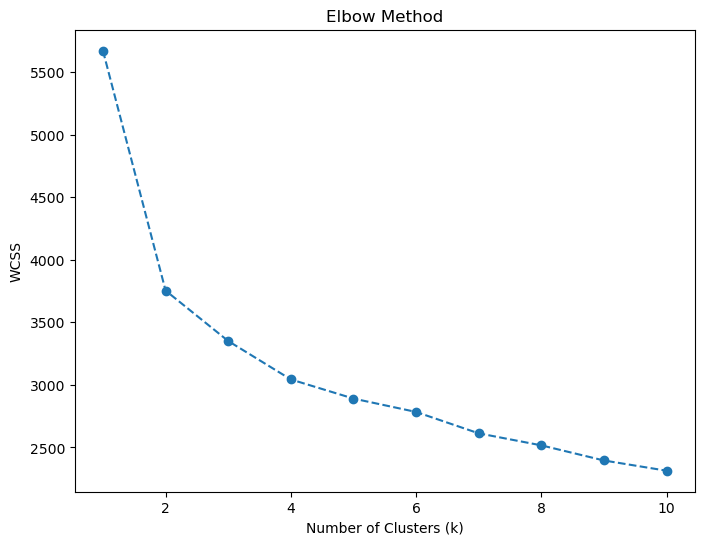

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Apply K-Means with k=3 (example)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# View the clusters
print(data['Cluster'].value_counts())

Cluster
2    570
1    450
0    433
Name: count, dtype: int64


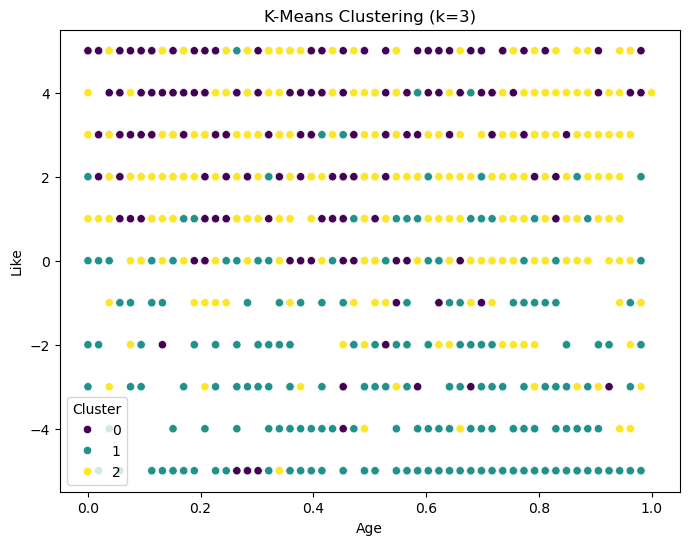

In [52]:
# Scatter plot: Age vs Like, colored by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Like', hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Age')
plt.ylabel('Like')
plt.show()

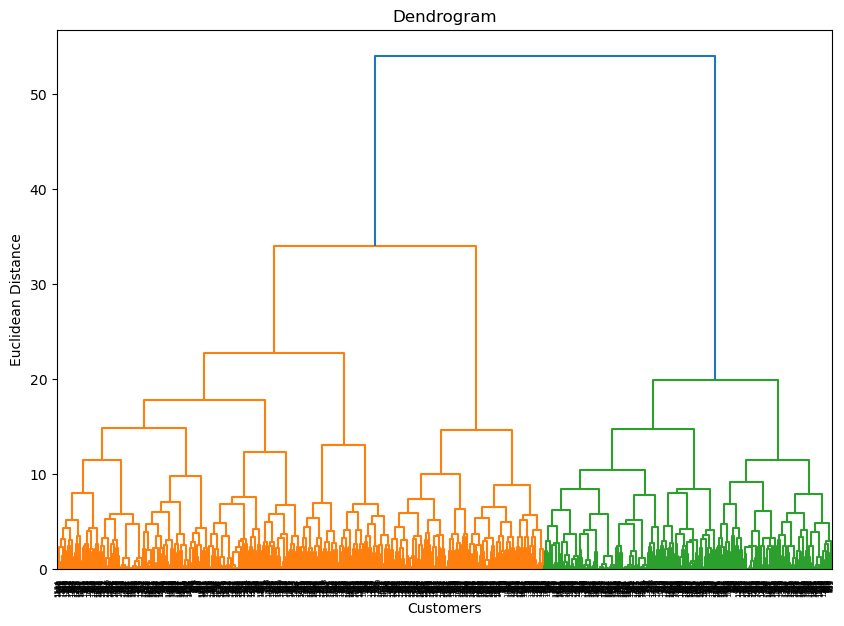

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering with n_clusters=3 (example)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster'] = hc.fit_predict(X)

# View the clusters
print(data['Cluster'].value_counts())

Cluster
0    625
1    541
2    287
Name: count, dtype: int64


In [60]:
# Define the features used for clustering
features = ['Age', 'VisitFrequency', 'Like', 'yummy', 'tasty', 'healthy']

# Group by Cluster and calculate mean values
cluster_profiles = data.groupby('Cluster')[features].mean()
print(cluster_profiles)

              Age  VisitFrequency      Like     yummy     tasty   healthy
Cluster                                                                  
0        0.536815             NaN  0.568000  0.497600  0.608000  0.161600
1        0.399749             NaN  2.939002  0.885397  0.927911  0.304991
2        0.618828             NaN -2.843206  0.045296  0.188153  0.080139


In [61]:
# Group by Cluster and calculate mean values
cluster_profiles = data.groupby('Cluster')[features].mean()
print(cluster_profiles)

              Age  VisitFrequency      Like     yummy     tasty   healthy
Cluster                                                                  
0        0.536815             NaN  0.568000  0.497600  0.608000  0.161600
1        0.399749             NaN  2.939002  0.885397  0.927911  0.304991
2        0.618828             NaN -2.843206  0.045296  0.188153  0.080139


In [63]:
# Save the clustered data
data.to_csv('mcdonalds_clustered.csv', index=False)

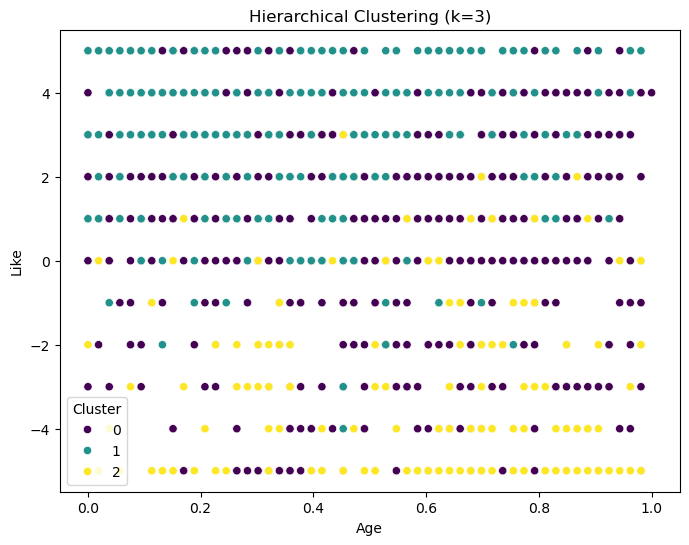

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Like', hue='Cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering (k=3)')
plt.xlabel('Age')
plt.ylabel('Like')
plt.show()